# Homework 3: Hunt Shifting Numbers

### Sources
    
    https://medium.com/the-data-science-publication/how-to-augment-the-mnist-dataset-using-tensorflow-4fbf113e99a0

### Import TensorFlow

In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tfc
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import cv2
from random import randint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

###### Define methods

In [2]:
def evaluate(testSet, testLabels, testModel):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = testModel.evaluate(testSet, testLabels, verbose=2) 
    print("ACCURACY: " + str(test_acc))
    
def displaySamplesFromDataSet(xDataSet, yDataset):
    # define number of images to show
    num_row = 2
    num_col = 8
    num= num_row*num_col
    
    # get images
    images = xDataSet[0:num]
    labels = yDataset[0:num]
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes[i//num_col, i%num_col]
         ax.imshow(images[i], cmap='gray_r')
         ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    plt.show()

def resizeAndShift(width_shift_val, height_shift_val, xDataSet, yDataset, label):
    datagen = ImageDataGenerator(width_shift_range=width_shift_val, height_shift_range=height_shift_val)
    
    new_shape = (56,56)
    returnDataSet = np.zeros(shape=(xDataSet.shape[0],)+new_shape)
    for idx in range(xDataSet.shape[0]):
        returnDataSet[idx][14: 14 + 28, 14: 14 + 28] = xDataSet[idx]

    # define number of rows & columns
    num_row = 2
    num_col = 8
    num= num_row*num_col

    # plot before
    print(label + ' BEFORE:\n')
    fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes1[i//num_col, i%num_col]
         ax.imshow(returnDataSet[i], cmap='gray_r')
         ax.set_title('Label: {}'.format(yDataset[i]))
    plt.tight_layout()
    plt.show()

    # plot after
    print(label + ' AFTER:\n')
    fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for X, Y in datagen.flow(returnDataSet.reshape(returnDataSet.shape[0], 56, 56, 1),yDataset.reshape(yDataset.shape[0], 1),batch_size=num,shuffle=False):
         for i in range(0, num):
              ax = axes2[i//num_col, i%num_col]
              ax.imshow(X[i].reshape(56,56), cmap='gray_r')
              ax.set_title('Label: {}'.format(int(Y[i])))
         break
    plt.tight_layout()
    plt.show()
    return returnDataSet

def resizeAndShiftHorizontal(width_shift_val, xDataSet, yDataset, label):
    datagen = ImageDataGenerator(width_shift_range=width_shift_val, height_shift_range=0)
    
    new_shape = (56,56)
    returnDataSet = np.zeros(shape=(xDataSet.shape[0],)+new_shape)
    for idx in range(xDataSet.shape[0]):
        yStart = 28
        yEnd = 56
        if label == 'TRAIN':
            yStart = 0
            yEnd = 28
                
        returnDataSet[idx][ yStart:yEnd, 14: 14 + 28] = xDataSet[idx]

    # define number of rows & columns
    num_row = 2
    num_col = 8
    num= num_row*num_col

    # plot before
    print(label + ' BEFORE:\n')
    fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes1[i//num_col, i%num_col]
         ax.imshow(returnDataSet[i], cmap='gray_r')
         ax.set_title('Label: {}'.format(yDataset[i]))
    plt.tight_layout()
    plt.show()

    # plot after
    print(label + ' AFTER:\n')
    fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for X, Y in datagen.flow(returnDataSet.reshape(returnDataSet.shape[0], 56, 56, 1),yDataset.reshape(yDataset.shape[0], 1),batch_size=num,shuffle=False):
         for i in range(0, num):
              ax = axes2[i//num_col, i%num_col]
              ax.imshow(X[i].reshape(56,56), cmap='gray_r')
              ax.set_title('Label: {}'.format(int(Y[i])))
         break
    plt.tight_layout()
    plt.show()
    return returnDataSet

### Task 1


###### Load MNIST data

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255
test_images = test_images / 255

##### Builidng a Training Pipeline - Task 1

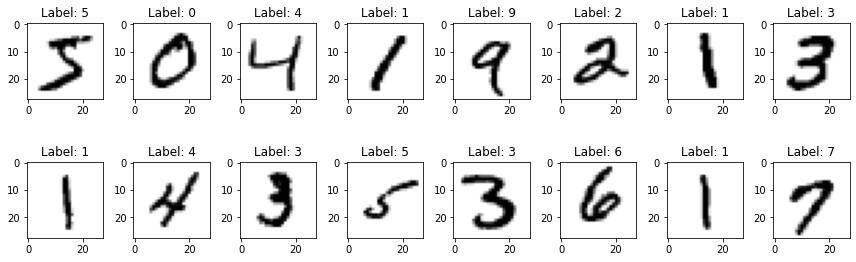

In [4]:
displaySamplesFromDataSet(train_images, train_labels)

##### Building a Evaluation Pipeline - Task 1

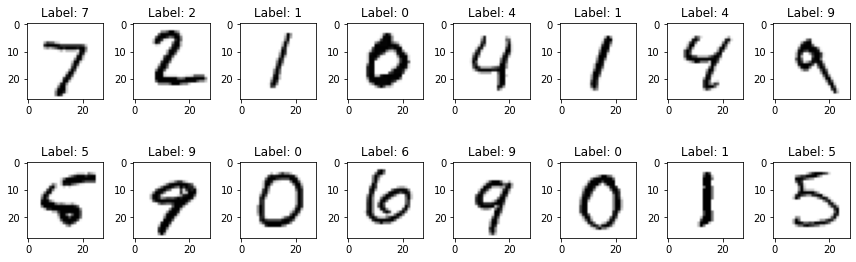

In [5]:
displaySamplesFromDataSet(test_images, test_labels)

##### Create and train the model - Task 1

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1551 - accuracy: 0.9523 - val_loss: 0.0447 - val_accuracy: 0.9865
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.0612 - val_accuracy: 0.9798
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0339 - val_accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.0292 - val_accuracy: 0.9911
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.0263 - val_accuracy: 0.9922


##### Evaluate the model - Task 1

313/313 - 0s - loss: 0.0263 - accuracy: 0.9922 - 438ms/epoch - 1ms/step
ACCURACY: 0.9922000169754028


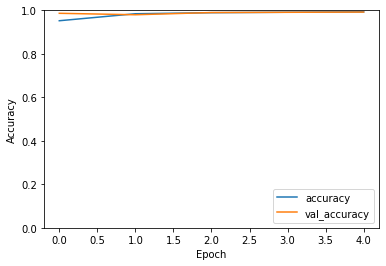

In [7]:
evaluate(test_images, test_labels, model)

### Task 2


###### Load MNIST data

In [10]:
from tensorflow.keras.datasets import mnist
(train_images_2, train_labels_2), (test_images_2, test_labels_2) = mnist.load_data()

In [11]:
train_images_2 = train_images_2 / 255
test_images_2 = test_images_2 / 255

##### Builidng a Training Pipeline - Task 2

TRAIN BEFORE:



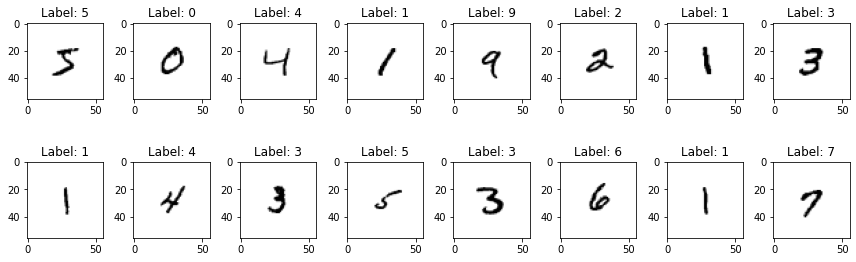

TRAIN AFTER:



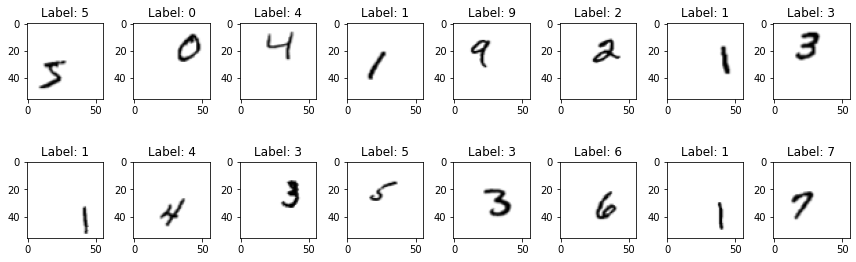

In [12]:
ds_train_2 = resizeAndShift(0.25, 0.25, train_images_2, train_labels_2, "TRAIN")

##### Building a Evaluation Pipeline - Task 2

TEST BEFORE:



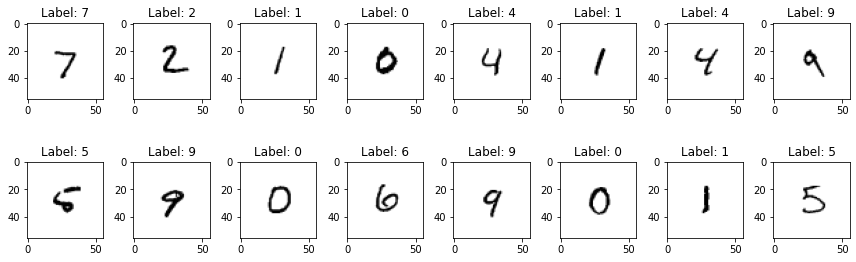

TEST AFTER:



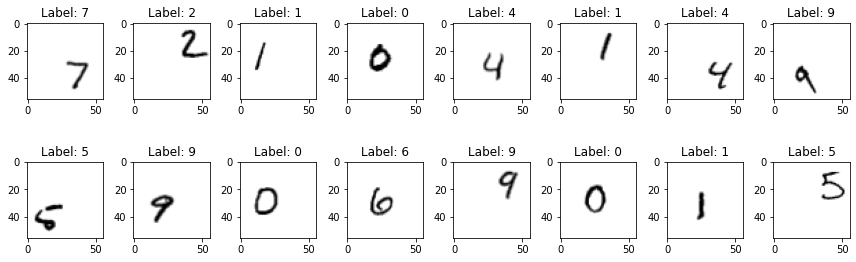

In [13]:
ds_test_2 = resizeAndShift(0.25, 0.25, test_images_2, test_labels_2, "TEST")

##### Create and train the model - Task 2

In [14]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(10))

model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_2.fit(ds_train_2, train_labels_2, epochs=5, 
                    validation_data=(ds_test_2, test_labels_2))

Epoch 1/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1209 - accuracy: 0.9618 - val_loss: 0.0381 - val_accuracy: 0.9871
Epoch 2/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0313 - val_accuracy: 0.9898
Epoch 3/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0282 - accuracy: 0.9910 - val_loss: 0.0377 - val_accuracy: 0.9871
Epoch 4/5
1875/1875 [==============================] - 70s 38ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0226 - val_accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0239 - val_accuracy: 0.9926


##### Evaluate the model - Task 2

313/313 - 2s - loss: 0.0239 - accuracy: 0.9926 - 2s/epoch - 7ms/step
ACCURACY: 0.9926000237464905


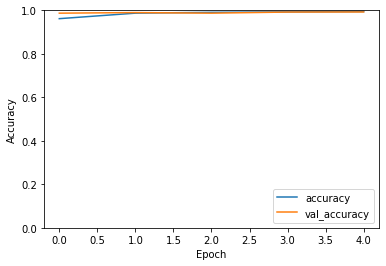

In [15]:
evaluate(ds_test_2, test_labels_2, model_2)

### Task 3


###### Load MNIST data

In [16]:
from tensorflow.keras.datasets import mnist
(train_images_3, train_labels_3), (test_images_3, test_labels_3) = mnist.load_data()

train_images_3 = train_images_3 / 255
test_images_3 = test_images_3 / 255

##### Builidng a Training Pipeline - Task 3

TRAIN BEFORE:



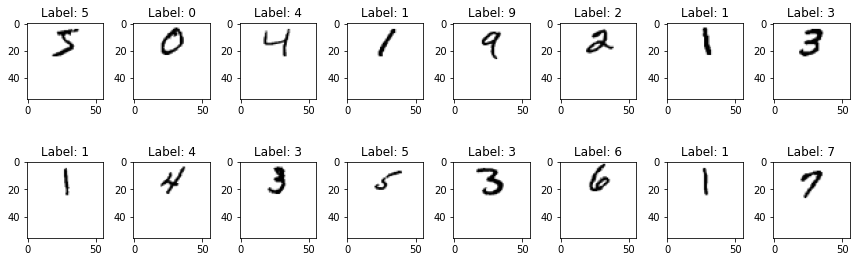

TRAIN AFTER:



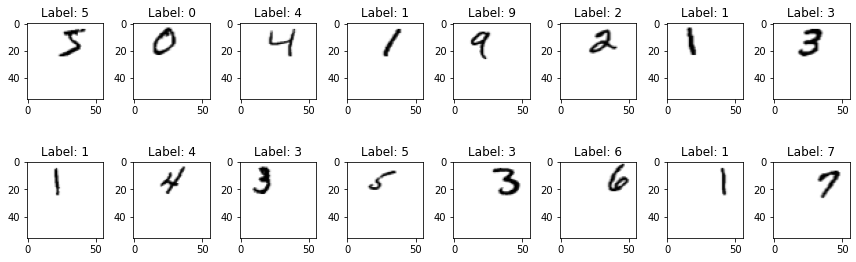

In [17]:
ds_train_3 = resizeAndShiftHorizontal(0.25, train_images_3, train_labels_3, "TRAIN")

##### Building a Evaluation Pipeline - Task 3

TEST BEFORE:



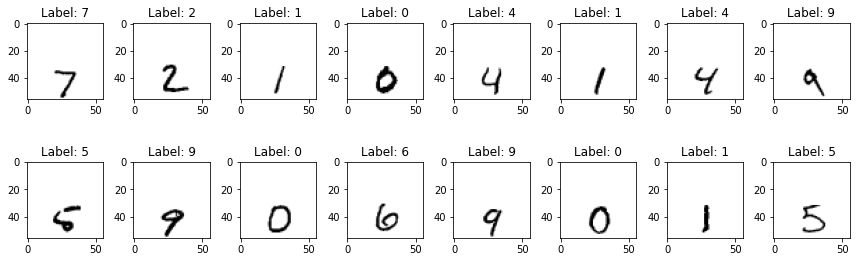

TEST AFTER:



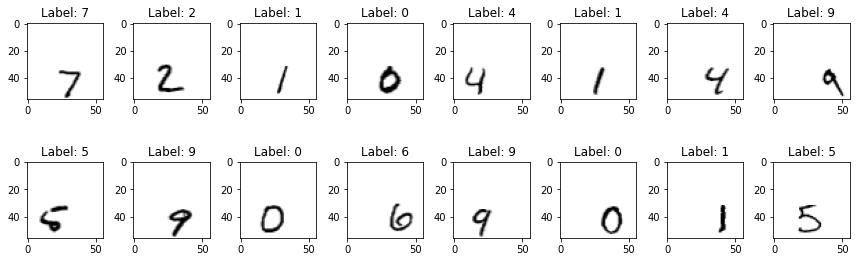

In [18]:
ds_test_3 = resizeAndShiftHorizontal(0.25, test_images_3, test_labels_3, "TEST")

##### Create and train the model - Task 3

In [19]:
model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 1)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.Flatten())
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(10))

model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_3.fit(ds_train_3, train_labels_3, epochs=5, 
                    validation_data=(ds_test_3, test_labels_3))

Epoch 1/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1299 - accuracy: 0.9589 - val_loss: 6.4310 - val_accuracy: 0.1007
Epoch 2/5
1875/1875 [==============================] - 72s 39ms/step - loss: 0.0432 - accuracy: 0.9862 - val_loss: 6.6296 - val_accuracy: 0.1250
Epoch 3/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 6.3957 - val_accuracy: 0.0979
Epoch 4/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 5.7341 - val_accuracy: 0.0838
Epoch 5/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 6.5251 - val_accuracy: 0.0888


##### Evaluate the model - Task 3

313/313 - 3s - loss: 6.5251 - accuracy: 0.0888 - 3s/epoch - 8ms/step
ACCURACY: 0.08879999816417694


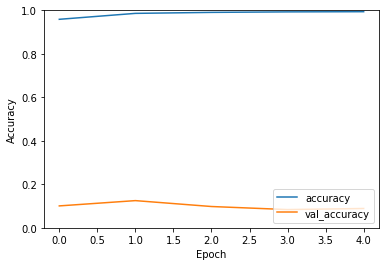

In [20]:
evaluate(ds_test_3, test_labels_3, model_3)